In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=names)

In [227]:
df.head(10)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [228]:
from sklearn.model_selection import train_test_split

In [229]:
#Divide dataset into features and output
X = df.drop('Class',1)
Y = df['Class']

C:\Users\mila1\AppData\Local\Temp\ipykernel_7440\3758152559.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Class',1)


In [230]:
#Divide dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [231]:
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [232]:
print(Y_train.shape, Y_test.shape)

(112,) (38,)


In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
from sklearn.preprocessing import StandardScaler

In [235]:
# Standartizing the features 
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [236]:
from sklearn.decomposition import PCA

In [237]:
#Implementing Logistic Regression model to compare it with PCA


logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,Y_train)

y_train_predict =logisticRegr.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_train_predict)*100
print('"Accuracy for our Training dataset with LogReg is: %.4f %%' % train_accuracy)
y_test_predict=logisticRegr.predict(X_test)
test_accuracy=accuracy_score(Y_test,y_test_predict)*100
test_accuracy
print("Accuracy for our Testing dataset with LogReg is : {:.3f}%".format(test_accuracy) )

"Accuracy for our Training dataset with LogReg is: 97.3214 %
Accuracy for our Testing dataset with LogReg is : 97.368%


In [238]:
pca = PCA(n_components =3)

In [239]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [240]:
#Implementing PCA model

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,Y_train)

y_train_predict =logisticRegr.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_train_predict)*100
print('"Accuracy for our Training dataset with PCA is: %.4f %%' % train_accuracy)
y_test_predict=logisticRegr.predict(X_test)
test_accuracy=accuracy_score(Y_test,y_test_predict)*100
test_accuracy
print("Accuracy for our Testing dataset with PCA is : {:.3f}%".format(test_accuracy) )

"Accuracy for our Training dataset with PCA is: 97.3214 %
Accuracy for our Testing dataset with PCA is : 97.368%


In [241]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.72212663 0.24133062 0.03206704]


In [242]:
principalComponents = pca.fit_transform(X_train) 
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

In [243]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy')   
rf_clf.fit(X_train,Y_train)
Y_predict = rf_clf.predict(X_test)

In [244]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [245]:
from mpl_toolkits import mplot3d
%matplotlib notebook

<IPython.core.display.Javascript object>


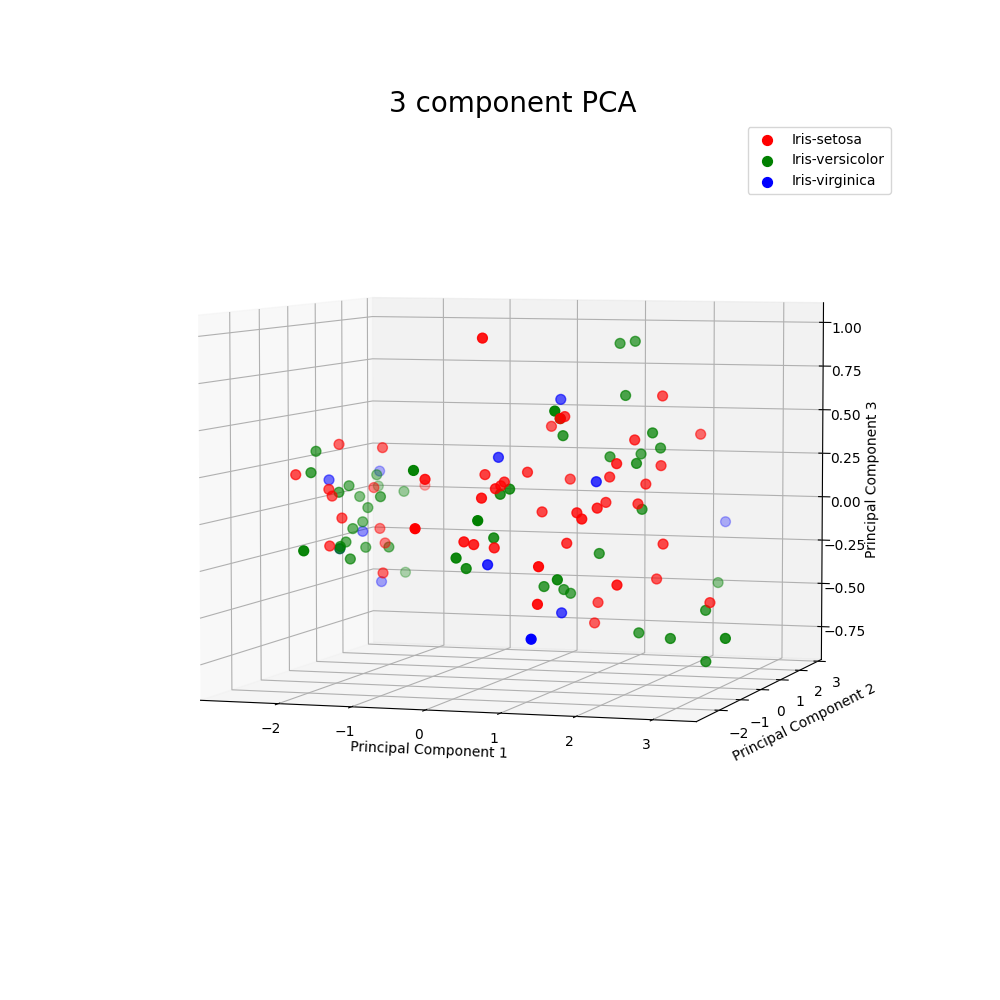

In [246]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 10) 
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_zlabel('Principal Component 3', fontsize = 10)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 
colors = ['r', 'g', 'b'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['Class'] == target 
    ax.scatter3D(finalDf.loc[indicesToKeep, 'principal component 1'] 
               , finalDf.loc[indicesToKeep, 'principal component 2'] 
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color 
               , s = 50) 
ax.legend(targets) 
ax.grid()


In [247]:
confusion_matrix(Y_test,Y_predict)

array([[13,  0,  0],
       [ 0, 14,  2],
       [ 0,  0,  9]], dtype=int64)

In [248]:
#Result: Good class_report, but on a 3D model it's a mess
print(classification_report(Y_test,Y_predict, digits=6))

                 precision    recall  f1-score   support

    Iris-setosa   1.000000  1.000000  1.000000        13
Iris-versicolor   1.000000  0.875000  0.933333        16
 Iris-virginica   0.818182  1.000000  0.900000         9

       accuracy                       0.947368        38
      macro avg   0.939394  0.958333  0.944444        38
   weighted avg   0.956938  0.947368  0.948246        38

